In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data_path = 'single_prot_processed_data.csv'

In [2]:
df = pd.read_csv(data_path, on_bad_lines='skip')
df.head()

/var/folders/f1/fcqwxxfn4sqbczpwghg752_c0000gn/T/ipykernel_31685/3911081350.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, on_bad_lines='skip')


,Unnamed: 0,BindingDB Reactant_set_id,Ligand SMILES,Target Name,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),kon (M-1-s-1),koff (s-1),BindingDB Target Chain Sequence,UniProt (SwissProt) Entry Name of Target Chain
0,0,1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,Dimer of Gag-Pol polyprotein [501-599],0.24,NaN,NaN,NaN,NaN,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,POL_HV1BR
1,1,2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,Dimer of Gag-Pol polyprotein [501-599],0.25,NaN,NaN,NaN,NaN,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,POL_HV1BR
2,2,3,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,Dimer of Gag-Pol polyprotein [501-599],0.41,NaN,NaN,NaN,NaN,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,POL_HV1BR
3,3,4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,Dimer of Gag-Pol polyprotein [501-599],0.8,NaN,NaN,NaN,NaN,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,POL_HV1BR
4,4,5,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,Dimer of Gag-Pol polyprotein [501-599],0.99,NaN,NaN,NaN,NaN,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,POL_HV1BR


In [3]:
print("Missing Ki values rate: ", df[['Ki (nM)']].isna().sum().values/len( df[['Ki (nM)']]))
print("Missing IC50 values rate: ", df[['IC50 (nM)']].isna().sum().values/len( df[['IC50 (nM)']]))
print("Missing Kd values rate: ", df[['Kd (nM)']].isna().sum().values/len( df[['Kd (nM)']]))
print("Missing EC50 values rate: ", df[['EC50 (nM)']].isna().sum().values/len( df[['EC50 (nM)']]))
print("Missing Kon values rate: ", df[['kon (M-1-s-1)']].isna().sum().values/len( df[['kon (M-1-s-1)']]))
print("Missing Koff values rate: ", df[['koff (s-1)']].isna().sum().values/len( df[['koff (s-1)']]))

Missing Ki values rate:  [0.79539902]
Missing IC50 values rate:  [0.33635218]
Missing Kd values rate:  [0.96080535]
Missing EC50 values rate:  [0.90635862]
Missing Kon values rate:  [0.99963719]
Missing Koff values rate:  [0.9996444]


Text(0.5, 0, 'Number of mutants of a given protein tested against a given ligand')

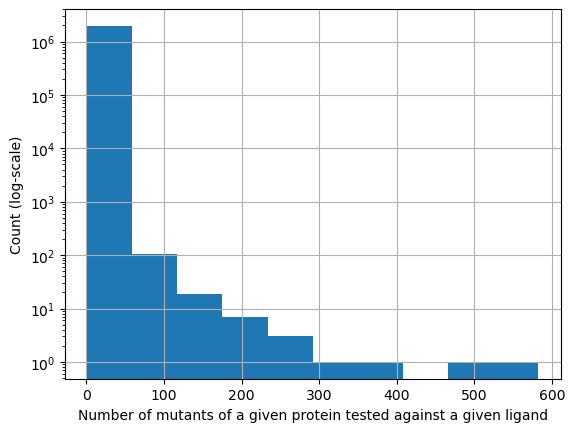

In [4]:
count2 = df.groupby(['Ligand SMILES', 'UniProt (SwissProt) Entry Name of Target Chain']).size().hist(log=True)
plt.ylabel('Count (log-scale)')
plt.xlabel('Number of mutants of a given protein tested against a given ligand')

In [26]:
arginase = df[df['Target Name']=='Carbonic anhydrase 2']
seq = arginase[arginase['Ligand SMILES'] == '[N-]=[N+]=[N-]']['BindingDB Target Chain Sequence'].values
for i in range(len(seq)-1):
    if seq[i] != seq[i+1]:
        print(seq[i])
        print(seq[i+1])
        print("---------")
    else:
        print('YES')

YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES


In [34]:
grouped = df.groupby(['Ligand SMILES', 'UniProt (SwissProt) Entry Name of Target Chain'])
lower_bound = 1
#upper_bound = 5000
filtered_groups = {name: group for name, group in grouped if len(group['Target Name'].unique()) > lower_bound}# and len(group['Target Name'].unique()) < upper_bound}


KeyboardInterrupt: 

In [11]:
grouped = df.groupby(['Ligand SMILES', 'UniProt (SwissProt) Entry Name of Target Chain']).apply(lambda x: len(x['Target Name'].unique()), include_groups=False)

In [19]:
grouped[grouped > 15]

Ligand SMILES                                                                                                                                                                                                                                                                                                UniProt (SwissProt) Entry Name of Target Chain
CC(C)(C)NC(=O)[C@@H]1CN(Cc2cccnc2)CCN1C[C@@H](O)C[C@@H](Cc1ccccc1)C(=O)N[C@@H]1[C@H](O)Cc2ccccc12                                                                                                                                                                                                            POL_HV1BR                                         16
                                                                                                                                                                                                                                                                                                          

In [22]:
df.loc[(df['Ligand SMILES'] == 'CC[C@H](C)[C@H](NC(=O)[C@H](CCCNC(N)=N)NC(=O)[C@H](CCC(N)=O)NC(=O)CNC(=O)[C@H](CCC(O)=O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CCCNC(N)=N)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](N)CO)C(=O)N[C@@H](C)C(=O)N[C@@H](CC(O)=O)C(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](Cc1cnc[nH]1)C(O)=O') & (df['UniProt (SwissProt) Entry Name of Target Chain']=='DPP9_HUMAN'), ['Target Name']].values

array([['Dipeptidyl peptidase 9'],
       ['Dipeptidyl peptidase 9 [Y277A]'],
       ['Dipeptidyl peptidase 9 [V285A]'],
       ['Dipeptidyl peptidase 9 [E286A]'],
       ['Dipeptidyl peptidase 9 [I288A]'],
       ['Dipeptidyl peptidase 9 [H289A]'],
       ['Dipeptidyl peptidase 9 [V290A]'],
       ['Dipeptidyl peptidase 9 [S292A]'],
       ['Dipeptidyl peptidase 9 [L295A]'],
       ['Dipeptidyl peptidase 9 [E286A,E297A]'],
       ['Dipeptidyl peptidase 9 [R298A]'],
       ['Dipeptidyl peptidase 9 [K299A]'],
       ['Dipeptidyl peptidase 9 [D301A]'],
       ['Dipeptidyl peptidase 9 [Y303D]'],
       ['Dipeptidyl peptidase 9 [Y305D]'],
       ['Dipeptidyl peptidase 9 [Y305A]']], dtype=object)

26

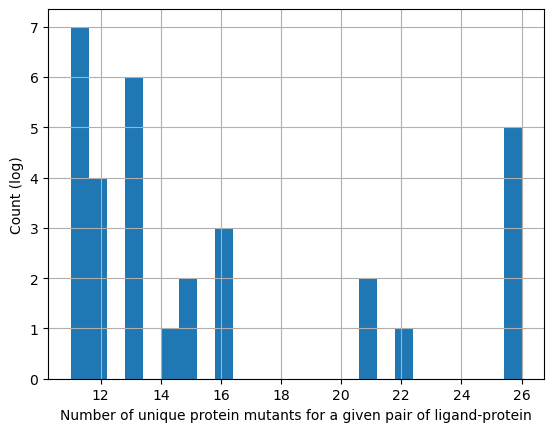

In [4]:
filtered_group = grouped[grouped > 10]
filtered_group.hist(bins = 25)
plt.xlabel('Number of unique protein mutants for a given pair of ligand-protein')
plt.ylabel('Count (log)')
max(filtered_group)

In [6]:
for group_name, group_data in grouped.items():
    print(f"Group: {group_name}")
    print(group_data['Target Name'].unique())
    print("\n")

Group: ('B.CP(c1ccccc1)c1ccc(O)cc1', 'ESR1_HUMAN')


TypeError: 'int' object is not subscriptable